# Principle Component Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [2]:
tag_list = pd.read_csv('genome-tags.csv')
movies_list = pd.read_csv('movies.csv')
scores = pd.read_csv('genome-scores.csv')
ratings =pd.read_csv('ratings.csv')

In [5]:
nw_movies_list=movies_list
nw_movies_list[['Title', 'Year']] = nw_movies_list['title'].str.split('(', n=1, expand=True)
nw_movies_list['Year'] = nw_movies_list['Year'].str.replace(')', '')
nw_movies_list['Title'] = nw_movies_list['Title'].str.strip()
nw_movies_list['Year'] = nw_movies_list['Year'].str.strip()
nw_movies_list=nw_movies_list.drop(['title'], axis=1)
movies_list=nw_movies_list
del nw_movies_list

/var/folders/xq/sn0x4f1x4rj6xds0z_m9fdzr0000gn/T/ipykernel_86140/522273311.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nw_movies_list['Year'] = nw_movies_list['Year'].str.replace(')', '')


In [6]:
movies_list_stack = movies_list[movies_list['genres'] != '(no genres listed)'].set_index('movieId').genres.str.split('|', expand = True).stack()
movies_list_explode = pd.get_dummies(movies_list_stack).groupby(level = 0).sum().reset_index()
# genre vector (binary string)
del movies_list_stack
nw_movies_list = movies_list.merge(movies_list_explode, on = 'movieId', how = 'left')
nw_movies_list.drop(['genres'],axis=1,inplace=True)
nw_movies_list

,movieId,Title,Year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,1995,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,1995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,1995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,1995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62418,209157,We,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62419,209159,Window of the Soul,2001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62420,209163,Bad Poems,2018,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62421,209169,A Girl Thing,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
nw_movies_list.dropna(inplace=True)
nw_movies_list.isna().sum()

movieId        0
Title          0
Year           0
Action         0
Adventure      0
Animation      0
Children       0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
IMAX           0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64

In [8]:
new_ratings = ratings[ratings['movieId'] <= 10000]

In [9]:
new_ratings = new_ratings[new_ratings['userId'] <= 10000]

In [10]:
new_ratings.max(axis=0)

userId       1.000000e+04
movieId      9.019000e+03
rating       5.000000e+00
timestamp    1.574313e+09
dtype: float64

In [11]:
rows, cols = (10001, 10001)
rating_value = [[0] * cols for _ in range(rows)]

In [12]:
for i in range (new_ratings.shape[0]):
    rating_value[int(new_ratings.iloc[i][0])][int(new_ratings.iloc[i][1])]=new_ratings.iloc[i][2]
rating_value = np.array(rating_value)

In [13]:
ars_movies_list=nw_movies_list[nw_movies_list['movieId'] <= 10000]

In [14]:
ars_movies_list['ratings'] = 0

/var/folders/xq/sn0x4f1x4rj6xds0z_m9fdzr0000gn/T/ipykernel_86140/3288686440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ars_movies_list['ratings'] = 0


In [15]:
for i in range(ars_movies_list.shape[0]):
    non_zero = np.count_nonzero(rating_value[:, int(ars_movies_list['movieId'].iloc[i])])
    col_sum = np.sum(rating_value[:,int(ars_movies_list['movieId'].iloc[i])])
    ars_movies_list['ratings'].iloc[i]=col_sum/non_zero 

/var/folders/xq/sn0x4f1x4rj6xds0z_m9fdzr0000gn/T/ipykernel_86140/808365088.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ars_movies_list['ratings'].iloc[i]=col_sum/non_zero
/var/folders/xq/sn0x4f1x4rj6xds0z_m9fdzr0000gn/T/ipykernel_86140/808365088.py:4: RuntimeWarning: invalid value encountered in double_scalars
  ars_movies_list['ratings'].iloc[i]=col_sum/non_zero


In [16]:
ars_movies_list

,movieId,Title,Year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,ratings
0,1,Toy Story,1995,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.908331
1,2,Jumanji,1995,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.282624
2,3,Grumpier Old Men,1995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.116438
3,4,Waiting to Exhale,1995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.897959
4,5,Father of the Bride Part II,1995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.102759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8300,9015,"Slipping-Down Life, A",1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.000000
8301,9016,Splatter University,1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.750000
8302,9017,Twist,2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000
8303,9018,Control Room,2004,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.942308


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [18]:
ars_movies_list.drop('Title', axis=1, inplace=True)
ars_movies_list.drop('Year', axis=1, inplace=True)

/var/folders/xq/sn0x4f1x4rj6xds0z_m9fdzr0000gn/T/ipykernel_86140/542807134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ars_movies_list.drop('Title', axis=1, inplace=True)
/var/folders/xq/sn0x4f1x4rj6xds0z_m9fdzr0000gn/T/ipykernel_86140/542807134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ars_movies_list.drop('Year', axis=1, inplace=True)


In [19]:
X_train, y_train=ars_movies_list.iloc[:, :-1],ars_movies_list["ratings"]

In [20]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10))
])

In [21]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=10))])

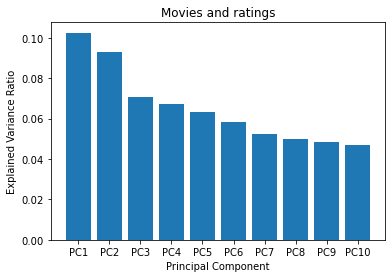

In [22]:
component_names = [f"PC{i+1}" for i in range(pipe['pca'].n_components_)]
plt.bar(component_names, pipe['pca'].explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Movies and ratings')
plt.show()